In [1]:
import io
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import requests
import urllib
import urllib.request 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input  
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os.path
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pickle
import sklearn
from sklearn import metrics
import os
import shutil
import math 

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/food_rec.csv")
df.head()

,Unnamed: 0,id,title,partition,url
0,0,00003a70b1,Crunchy Onion Potato Bake,test,"http://img.sndimg.com/food/image/upload/w_512,..."
1,1,000075604a,Kombu Tea Grilled Chicken Thigh,train,https://img-global.cpcdn.com/001_recipes/58069...
2,2,00007bfd16,Strawberry Rhubarb Dump Cake,train,"http://img.sndimg.com/food/image/upload/w_512,..."
3,3,000095fc1d,Yogurt Parfaits,train,http://tastykitchen.com/recipes/wp-content/upl...
4,4,0000b1e2b5,Fennel-Rubbed Pork Tenderloin with Roasted Fen...,train,http://assets.epicurious.com/photos/5609a4d662...


In [3]:
df_train=df.loc[df['partition'] == "train"]
df_test=df.loc[df['partition'] == "test"]
df_val=df.loc[df['partition'] == "val"]

In [4]:
df_train_3000=df_train[0:3000]


In [5]:
for i,j in zip(df_train_3000["url"],df_train_3000["title"]):
  image_url = i
  name = "{}.jpg".format(j)
  try:
    imf = urllib.request.urlretrieve(image_url,name)
  except :
    pass

In [6]:
path = "/content"

os.chdir(path)

food_imgs = []

with os.scandir(path) as files:
    for file in files:
      if file.name.endswith('.jpg'):
        food_imgs.append(file.name)

In [7]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

553476096/553467096 [==============================] - 5s 0us/step


In [8]:
data = {}
p = "/content/foodpickle.pkl"

# lop through each image in the dataset
for food_img in food_imgs:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(food_img,model)
        data[food_img] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
(210, 4096)
label = df_train_3000['title'].tolist()
unique_labels = list(set(label))

In [9]:
pca = PCA(n_components=0.99)
pca.fit(feat)
x = pca.transform(feat)

In [10]:
km = KMeans(n_clusters=200)  
clusts = km.fit(x)

In [11]:
km.labels_

array([152,  20,  69, ...,   1,  30,  51], dtype=int32)

In [12]:
groups = {}
for file, cluster in zip(filenames,km.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [18]:
groups[5]

['Red Devil.jpg',
 'Pots De Creme.jpg',
 'Orange-Marshmallow Pops.jpg',
 "Emeril's Mango Lassi.jpg",
 'Southwestern Corn and Red Pepper Chowder.jpg',
 'Caramel Coffee.jpg',
 'Kinako Milk Agar Jello.jpg',
 'Salted Caramel Hot Cocoa.jpg',
 'Iced Mocha Coffee.jpg',
 'Easy Chocolate Souffle (Mark Bittman).jpg',
 'Pineapple Ginger Smoothie.jpg',
 'Mango Oatmeal Breakfast Smoothie.jpg',
 'Molasses and Cream Coffee.jpg',
 'Ice Cream and Candy Shakes.jpg',
 'Harry Potter Butter Beer.jpg',
 'Strawberry-Citrus Smoothie.jpg',
 'Chicken Potato Corn Chowder.jpg',
 'Cocoa Coffee Caramel Latte.jpg',
 'White Chocolate Mint Cappuccino.jpg',
 'Feeling Down.jpg',
 'Berry Kamikazi.jpg']

In [22]:
groups[9]

['Split Pea Soup With Caramelized Onions and Cumin Seed.jpg',
 'BLT&C Soup.jpg',
 'Smoked Pistachio Sambal.jpg',
 'Easy One Pot Soup with Kabocha Squash.jpg',
 'Turkey Stew.jpg',
 "Mateo's Better then Your Taco Shop Salsa.jpg",
 'Red Lentil, Miso and Shiitake Mushroom Soup.jpg',
 'Cream Stew without Roux.jpg',
 'Pioneer Woman - Tomato Soup With Sherry.jpg',
 'Yellow Dhal - Sweet Potato Soup.jpg',
 'Warm Garbanzo Bean and Kale Salad with Smoked Paprika and Parsley Vinaigrette.jpg',
 'Pumpkin and Shrimp Bisque.jpg',
 'Sauteed Trout Filet Topped with Apple Mostardo and Garlicky Collard Greens.jpg',
 'Butternut Squash Soup Recipe.jpg',
 'Green Soup.jpg',
 'Fennel-Orange Gremolata.jpg',
 'Spicy Chicken Curry.jpg',
 'Mushroom Vegetable Soup.jpg',
 'Tortilla-Beef Soup.jpg',
 'Vickys Vegetable Scotch Broth.jpg']

In [24]:
groups[11]

['Bar Chicks - Blackened Chicken Sliders.jpg',
 'Bean, Bacon, and Blue Cheese Dip.jpg',
 'Sopapillia Cheesecake.jpg',
 'Hoisin Chicken Crepes.jpg',
 "Michelle's Turkey Burgers with Lemon Mayonnaise.jpg",
 'Slow-Cooker Pot Roast Sandwiches.jpg',
 'Slow Cooker Italian Turkey.jpg',
 'Chocolate Almond Sandwich.jpg',
 'Bacon, Tomato & Parmesan Rolls With Rosemary Mayonnaise.jpg',
 'Shredded Roast Beef Poboys.jpg',
 'The British Bulldog! Traditional Layered Beef Steak Suet Pudding.jpg',
 'Crock Pot Kalua Pork.jpg',
 'Barbecued Santa Fe Chicken Sandwich.jpg',
 'Quick Pain Au Chocolat.jpg',
 'Ham and Gouda Panini.jpg',
 'Blazing Bronco Burgers With Smoking Chipotle Honey Sauce.jpg',
 'Root Beer Sloppy Joes.jpg',
 'Cheese Crisp Burger.jpg',
 'Cajun Chicken Sandwich.jpg',
 'Grilled Veggie Quesadillas.jpg']

In [25]:
groups[26]

['Skillet-Roasted Spiced Okra.jpg',
 'Puffed-Up Zucchini.jpg',
 'Saltimbocca Alla Pollo.jpg',
 'Whole30 Thai Stir Fry.jpg',
 'Easy Chicken and Dumplings.jpg',
 'Char Siu Pork Corn and Bok Choy Stir Fry.jpg',
 'Grilled Orange Sesame Chicken and Vegetables.jpg',
 'Ginger Soy Chicken.jpg',
 'Lemon-Tarragon Crab Cakes.jpg',
 'Mustard-Crusted Tofu with Kale and Sweet Potato.jpg',
 'Creamed Spinach.jpg',
 'Fresh Tuna Steaks With Lemon.jpg',
 'Baked Salmon with Tomatoes, Spinach & Mushrooms.jpg',
 'German Chicken Paprikash.jpg',
 'South American Cheese Sauce.jpg',
 'Spicy Asian Marinated Flank Steak.jpg',
 'Eggs Pesto.jpg',
 'Saucy Mama Pacific Rim Ginger Beef and Snap Peas.jpg',
 'Salmon with Sweet Chili Glaze, Sugar Snap Peas, and Pea Tendrils.jpg',
 'Hungarian Cucumber Salad.jpg',
 'Honey-Hoisin Pork Tenderloin.jpg',
 'Awesome Pan Fried Potatoes.jpg',
 'Baked Chicken & Gravy.jpg',
 'Chicken Legs in White Wine Sauce.jpg',
 'Garlic Pasta with Prawns.jpg',
 'Easy Chicken Picante.jpg',
 'Scall

In [34]:
df_test_1 = df_test.sample(n=500)

In [35]:
for i,j in zip(df_test_1["url"],df_test_1["title"]):
  image_url = i
  name = "{}.png".format(j)
  try:
    imf = urllib.request.urlretrieve(image_url,name)
  except :
    pass

In [29]:
path = "/content"

os.chdir(path)

food_imgs_test = []

with os.scandir(path) as files:
    for file in files:
      if file.name.endswith('.png'):
        food_imgs_test.append(file.name)

In [31]:
data = {}
p = "/content/foodpickle.pkl"

# lop through each image in the dataset
for food_img in food_imgs_test:
    # try to extract the features and update the dictionary
    try:
        feat_t = extract_features(food_img,model)
        data[food_img] = feat_t
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat_t = np.array(list(data.values()))
feat_t.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat_t = feat_t.reshape(-1,4096)
feat_t.shape
(210, 4096)
label = df_train_3000['title'].tolist()
unique_labels = list(set(label))

In [37]:
pca = PCA(n_components=0.99)
pca.fit(feat_t)
x = pca.transform(feat_t)

In [67]:
km = KMeans(n_clusters=100)  
clusts = km.fit_predict(x)

In [68]:
clusters = {}
for file, cluster in zip(filenames,km.labels_):
    if cluster not in clusters.keys():
        clusters[cluster] = []
        clusters[cluster].append(file)
    else:
        clusters[cluster].append(file)

In [76]:
clusters[7]

['Baked Berry Oatmeal Goodness.png',
 'Cafe-Style Puffed Wheat Squares.png',
 'Snowcapped Cherry Nibbles.png',
 'Better-Than-Regular Brownies (Christmas Style!).png',
 'Moroccan Lamb with Shiraz Honey Sauce.png',
 'Cranberry Onion Chicken.png',
 'Chinese Spareribs.png',
 'Turkey Bacon Cornbread Muffins.png',
 'Tropical Kumquat Cake.png',
 'Eclair Cake.png',
 'Eggplant Torta.png',
 'Russian Stuffed Meatloaf.png',
 'No Bake " Chocolate Chip Cookie Pie " ( made with Chips Ahoy)....png',
 'Candy Cane KISS Blondies.png',
 'Fluffernutter SMores Brownie Bars.png',
 'Chocolate Nutella Molten Lava Cake.png',
 'Dark Chocolate, Cranberry and Macadamia Bars.png']

In [80]:
clusters[11]

['Shortcakes with Fresh Berries.png',
 'Lemony Blueberry Layered Pie.png',
 'Steamed Bread Made in Parchment Paper.png',
 'Neiman Marcus Cake I.png',
 'American Flag Cake.png',
 'Carrot Cake With Cream Cheese Frosting.png',
 'Simple Microwave Steamed Bread with Yogurt & Pancake Mix.png',
 'Creamy Chocolate Roll with Berries.png',
 'PHILADELPHIA Classic Cheesecake with Raspberry Sauce.png',
 'Chicken and Black Bean Bake.png',
 'Blueberry Lemon Bread.png',
 'Confetti Celebration Cake.png',
 'Pistachio Cupcakes with Pink Champagne Frosting.png',
 'Garden Greek Pasta Salad.png',
 'Chocolate Strawberry Shortcake.png',
 'Blueberry French Toast.png',
 'Sour Cream Dessert Omelet.png',
 'Chocolate Cluster-Peanut Butter Cake.png',
 'Gingerbread Nut Torte.png',
 'Egg and Dairy Free! Strawberry Sponge Cake.png']

In [82]:
clusters[13]

['Eggplant Tomato Salad.png',
 'Strawberry Dressing.png',
 'Stir-fried Tofu With Carrots and Red Peppers.png',
 'Red, White and Blue Salad.png',
 'Grilled Scallops with Parsley Salad.png',
 'Zucchini Coleslaw.png',
 'Greek Grilled Chicken Salad.png',
 'Brie, Pear, Cranberry, and Walnut Salad.png',
 'Tomato and Basil with Lemon Flavored Dressing.png',
 "Grandma's French Dressing.png",
 'Kale With Garlic N Tomatoes.png',
 'Grilled Caprese Chicken with a Balsamic Reduction.png',
 'Easy Cajun Chicken Caesar Salad.png',
 'Chicken Nicoise Salad.png',
 'Roasted Broccoli and Tomatoes.png',
 'Potato, Italian Sausage, and Arugula Salad.png']

In [90]:
clusters[21]

['Gingerbread Latte.png',
 'The Elvis Smoothie.png',
 'Kahlua Kiss.png',
 'Baileys Spiced Frappe.png',
 'Peanut Butter Banana Breakfast Smoothie.png',
 'Chocolate Iced Coffee.png',
 'Ham, Leek and Gouda Souffles.png',
 'Campari and Orange Sparkling Cocktail.png',
 'Peppermint Froth.png',
 'Pumpkin Spice Coffee Syrup.png',
 'Frozen Margaritas.png']

In [ ]:
clusters[24]

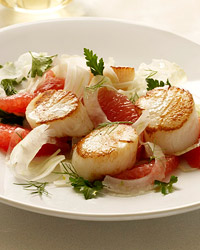

In [105]:
from IPython.display import Image
Image('Grilled Scallops with Parsley Salad.png')